### Import Python Libraries

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_csv('C:/Users/thisi/Downloads/lantern-mayday-cn.csv')

### Print Data in Pd DataFrame

In [3]:
df.head(100)

,filename,date,year,month,keyword,count
0,cn1962-03-14.txt,1962-03-14,1962,3,May Day,1
1,cn1939-03-01.txt,1939-03-01,1939,3,May Day,5
2,cn1917-05-09.txt,1917-05-09,1917,5,May Day,4
3,cn1950-05-10.txt,1950-05-10,1950,5,May Day,4
4,cn1939-03-15.txt,1939-03-15,1939,3,May Day,2
...,...,...,...,...,...,...
95,cn1935-10-23.txt,1935-10-23,1935,10,May Day,2
96,cn1935-10-23.txt,1935-10-23,1935,10,Lantern Night,7
97,cn1956-05-01.txt,1956-05-01,1956,5,May Day,11
98,cn1956-05-01.txt,1956-05-01,1956,5,Lantern Night,1


### Histogram: .hist() Function

<AxesSubplot:>

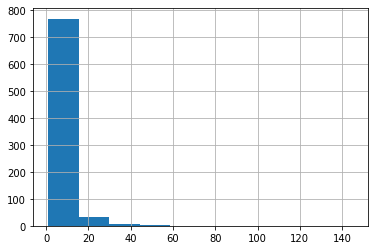

In [4]:
df["count"].hist()

### Selecting Data with Filter

In [5]:
mayday_filter = df["keyword"] == "May Day"

In [6]:
df_mayday = df.loc[mayday_filter, :]

In [7]:
lantern_filter = df["keyword"] == "Lantern Night"

In [8]:
df_lantern = df.loc[lantern_filter, :]

### Histogram: Distribution of Keywords in Issues Respectively

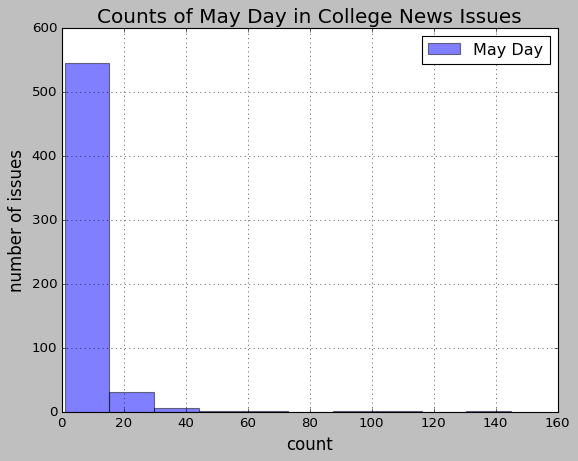

In [9]:
from matplotlib.pyplot import figure
plt.style.use('classic')
df_mayday["count"].hist(alpha=0.5, label='May Day')
plt.legend(loc='upper right')
plt.xlabel("count", fontsize = 15)
plt.ylabel("number of issues", fontsize = 15)
plt.title("Counts of May Day in College News Issues", fontsize = 18)

plt.savefig('C:/Users/thisi/Desktop/Python/cn-dataviz/maydaywordcount.png', dpi = 600)

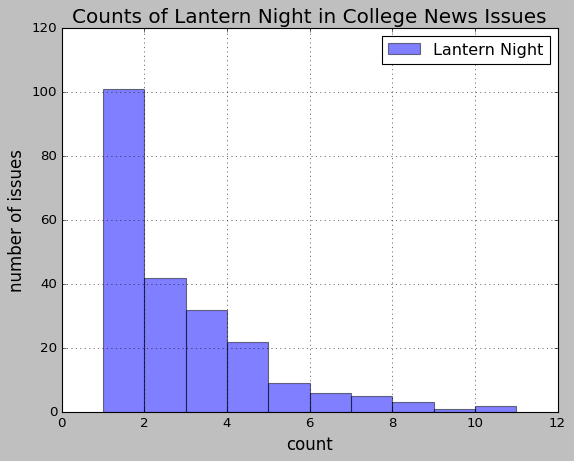

In [10]:
df_lantern["count"].hist(alpha=0.5, label="Lantern Night")
plt.legend(loc='upper right')
plt.xlabel("count", fontsize = 15)
plt.ylabel("number of issues", fontsize = 15)
plt.title("Counts of Lantern Night in College News Issues", fontsize = 18)

plt.savefig('C:/Users/thisi/Desktop/Python/cn-dataviz/lanternnightwordcount.png', dpi = 600)

### Combined Histogram

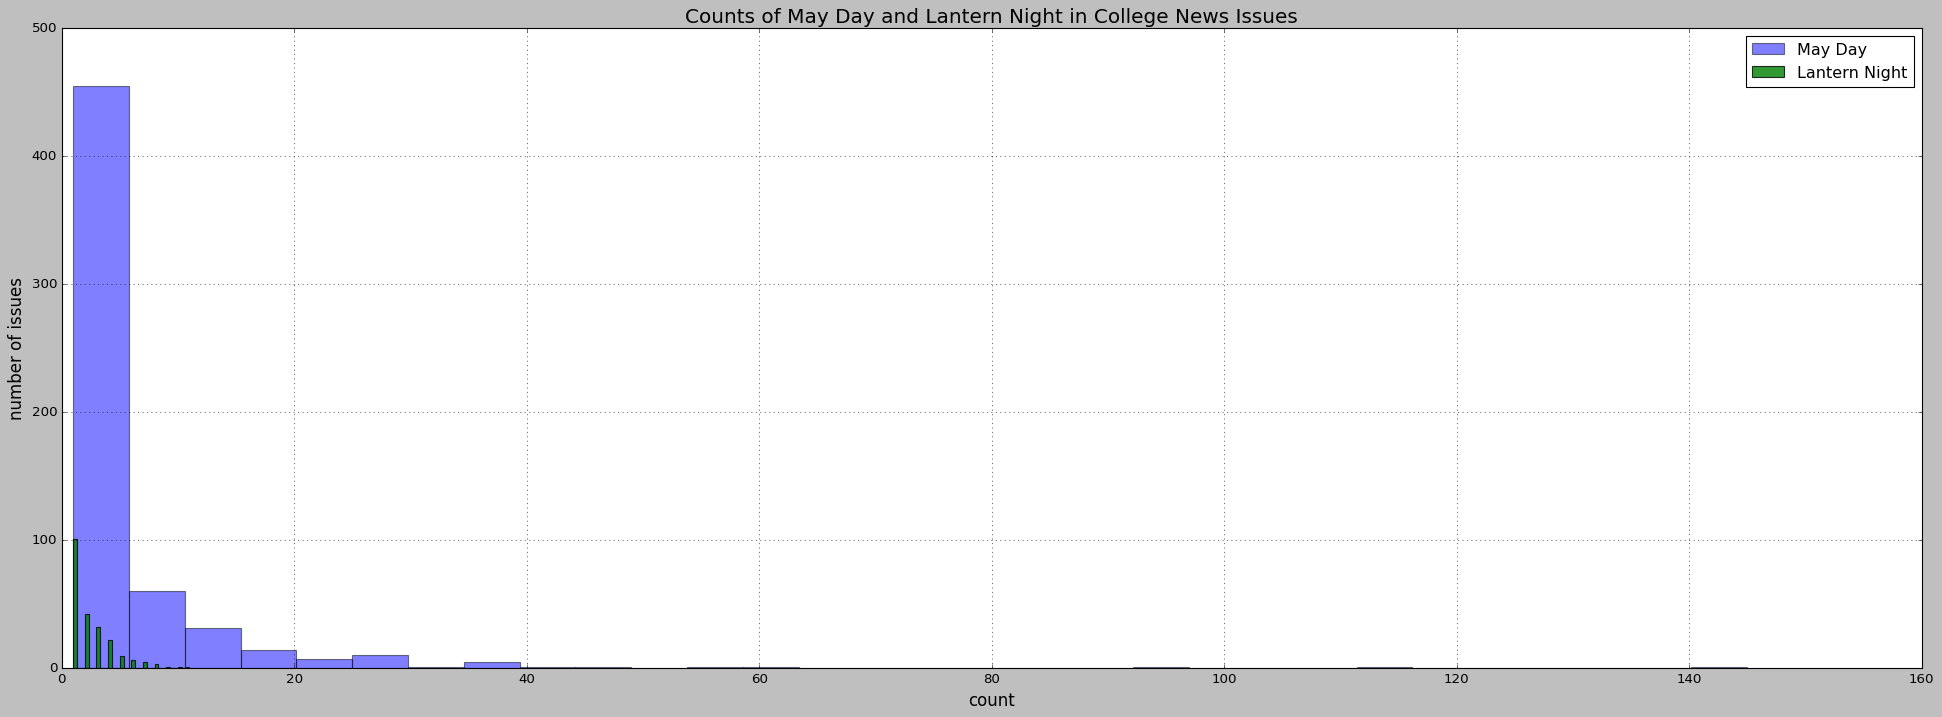

In [11]:
from matplotlib.pyplot import figure
plt.figure(figsize = (30, 10))
df_mayday["count"].hist(alpha=0.5, label='May Day', bins=30, edgecolor="black")
df_lantern["count"].hist(alpha=0.8, label="Lantern Night", bins=30, edgecolor="black")
plt.legend(loc='upper right')
plt.xlabel("count", fontsize = 15)
plt.ylabel("number of issues", fontsize = 15)
plt.title("Counts of May Day and Lantern Night in College News Issues", fontsize = 18)

plt.savefig('C:/Users/thisi/Desktop/Python/cn-dataviz/traditionswordcount.png', dpi = 600)

#### Conclusions:
- May Day on average received significantly more coverage than Lantern Night in the College News
- Histogram is not an appropriate data visualizatioin strategy for this set of data

### Dot Plot: Mentions of Traditions by Month

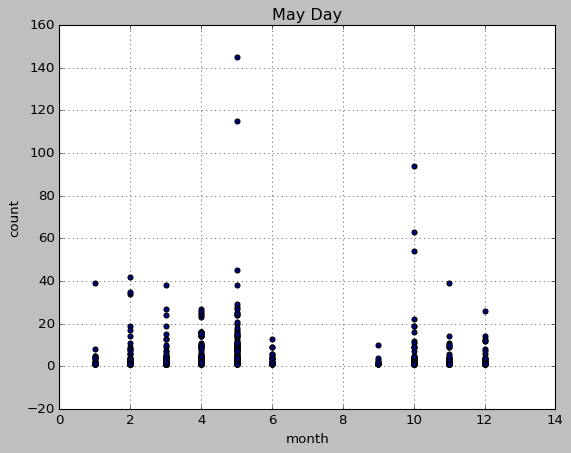

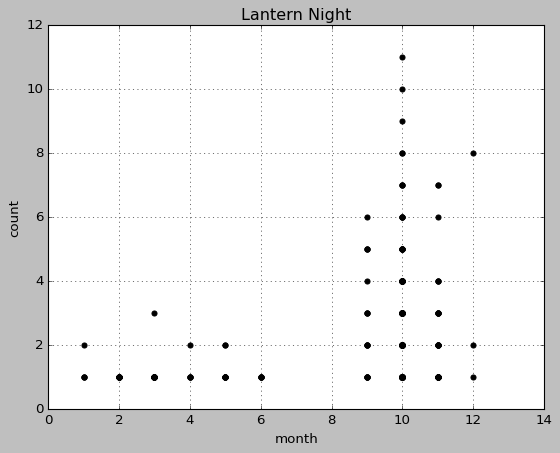

In [12]:
plt.style.use("classic")
df_mayday.plot.scatter(x='month', y='count', c='DarkBlue', title="May Day", grid="True")
df_lantern.plot.scatter(x='month', y='count', c='black', title="Lantern Night", grid="True")
plt.savefig('C:/Users/thisi/Desktop/Python/cn-dataviz/wordcountbymonth.png', dpi = 600)

#### Conclusion
- Traditions were generally mentioned more around the time they took place

### Dot Plot: Mentions of Traditions by Year

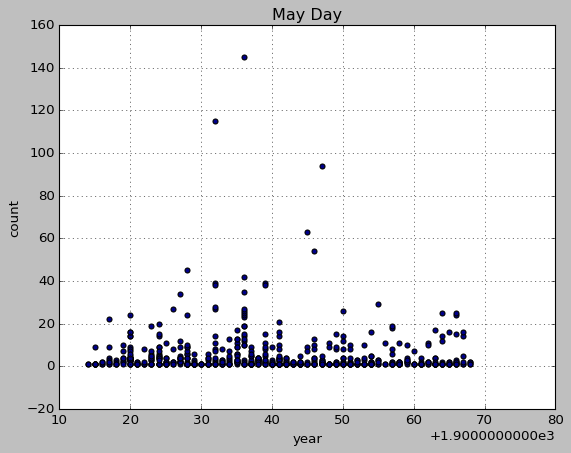

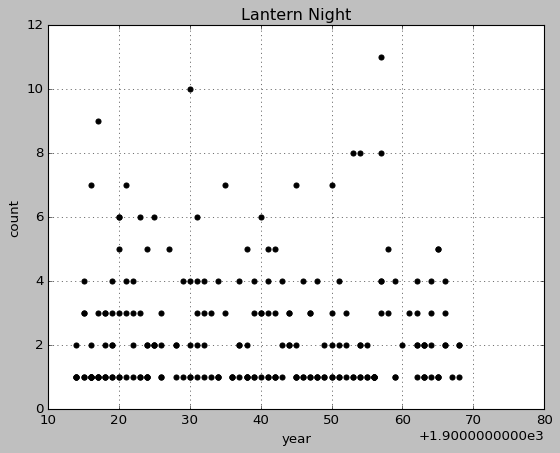

In [13]:
df_mayday.plot.scatter(x='year', y='count', c='DarkBlue', title="May Day", grid="True")
df_lantern.plot.scatter(x='year', y='count', c='black', title="Lantern Night", grid="True")
plt.savefig('C:/Users/thisi/Desktop/Python/cn-dataviz/wordcountbyyear.png', dpi = 600)

- no significant trend or pattern

### Scatter Plot: Count of Keywords Over Years

In [14]:
mayday_byyear=df_mayday.groupby('year', as_index=False).agg({"count": "sum"})

In [15]:
lantern_byyear=df_lantern.groupby('year', as_index=False).agg({"count": "sum"})

<AxesSubplot:title={'center':'May Day'}, xlabel='year', ylabel='count'>

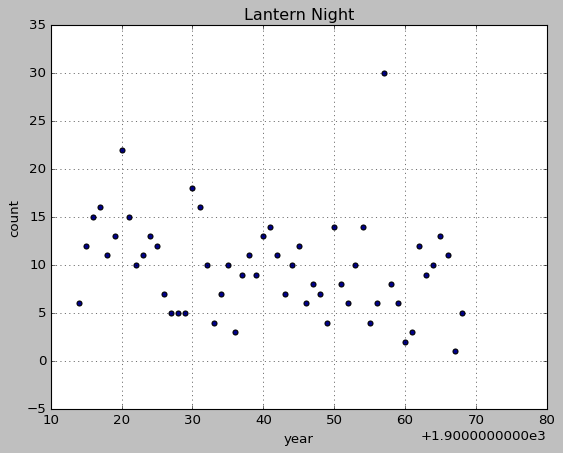

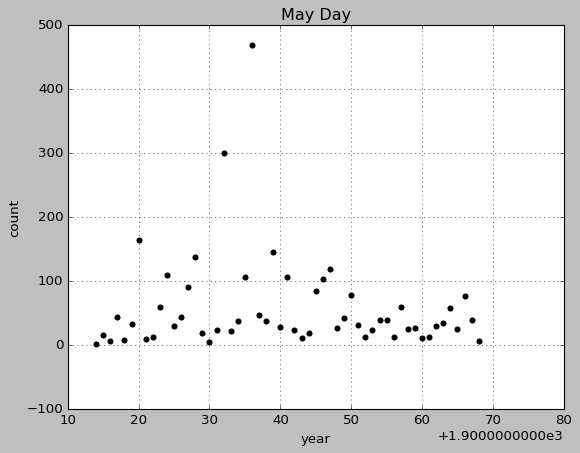

In [17]:
lantern_byyear.plot.scatter(x='year', y='count',c='DarkBlue', title="Lantern Night", grid="True")
mayday_byyear.plot.scatter(x='year', y='count',c='black', title="May Day", grid="True")

### Adding Regression Lines (just for fun)

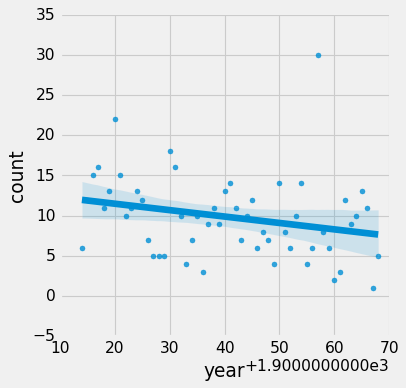

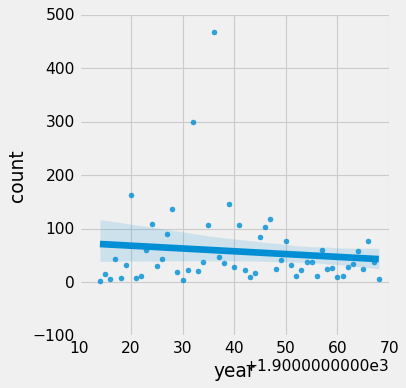

In [34]:
import seaborn as sns
sns.lmplot(x="year", y="count", data=lantern_byyear)
sns.lmplot(x="year", y="count", data=mayday_byyear)

### Calculating Correlation Coefficient (again just for fun)

In [37]:
from scipy import stats
stats.pearsonr(lantern_byyear['count'], lantern_byyear['year'])

(-0.24998760750488744, 0.06566250804729659)

In [38]:
stats.pearsonr(mayday_byyear['count'], mayday_byyear['year'])

(-0.10901262548453597, 0.428211935907574)

#### Conclusion
- There is a slight negative correlation between the year and count variables
- Meaning the frequency of traditions coverage may have slightly decreased over time, particularly in the case of May Day
    - because the absolute value of correlation coefficient (r) is larger than 0.2
- ! This is just for fun because I miss stats !

### Inidividual Bar Graphs of May Day and Lantern Night Over Year

<AxesSubplot:title={'center':'May Day'}, xlabel='year'>

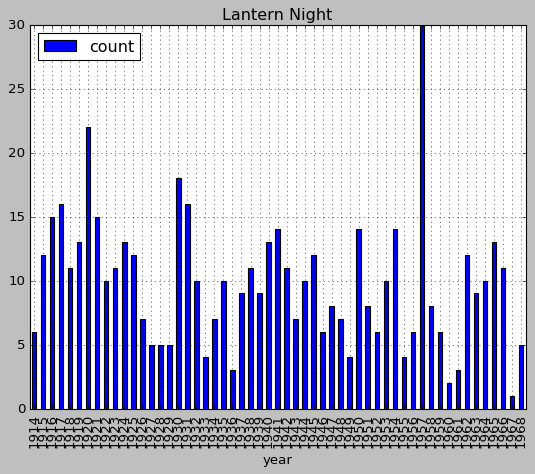

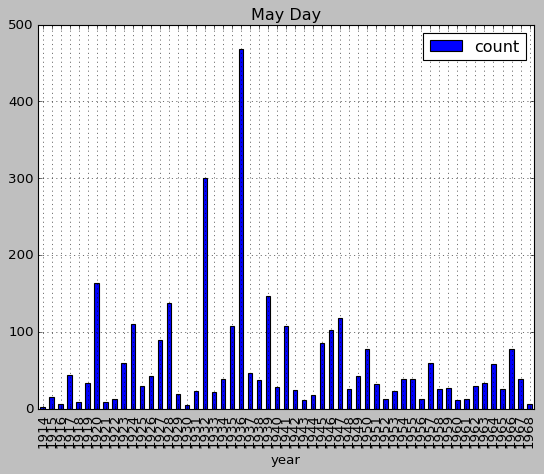

In [18]:
lantern_byyear.plot.bar(x='year', y='count', title="Lantern Night", grid="True")
mayday_byyear.plot.bar(x='year', y='count', title="May Day", grid="True")

### Side-by-side Bar Graph

#### Converting Variables from Pd Series to Lists

In [19]:
lantern_byyear_count = lantern_byyear.loc[:, "count"]
mayday_byyear_count = mayday_byyear.loc[:,"count"]
year = df.loc[:, 'year']
year_list = year.values.tolist()
lantern_list = lantern_byyear_count.values.tolist()
mayday_list = mayday_byyear_count.values.tolist()

#### Print Variable/Type

In [20]:
lantern_byyear_count

0      6
1     12
2     15
3     16
4     11
5     13
6     22
7     15
8     10
9     11
10    13
11    12
12     7
13     5
14     5
15     5
16    18
17    16
18    10
19     4
20     7
21    10
22     3
23     9
24    11
25     9
26    13
27    14
28    11
29     7
30    10
31    12
32     6
33     8
34     7
35     4
36    14
37     8
38     6
39    10
40    14
41     4
42     6
43    30
44     8
45     6
46     2
47     3
48    12
49     9
50    10
51    13
52    11
53     1
54     5
Name: count, dtype: int64

#### Make a Index of Timeline with Year Variable

In [21]:
year_list.sort()
year_finallist = [i for j, i in enumerate(year_list) if i not in year_list[:j]] 
print(list(year_finallist))

[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968]


#### Combine Lists to a pd DataFrame for Initial Bar Graph

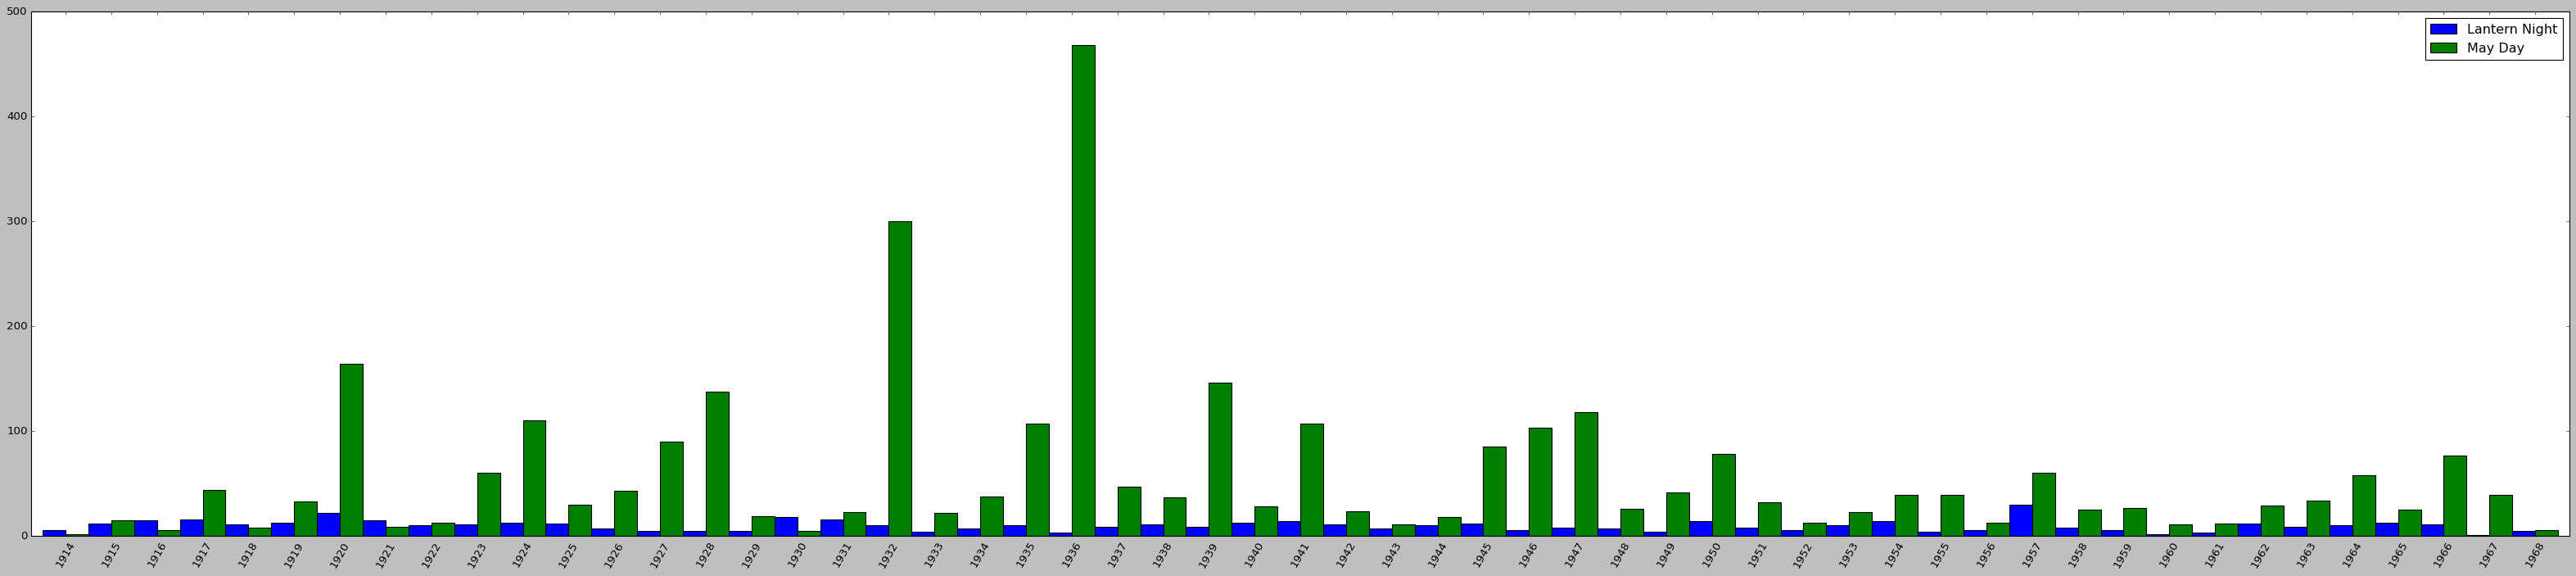

In [22]:
bargraphdata = pd.DataFrame({'Lantern Night': lantern_list,
                   'May Day': mayday_list}, index=year_finallist)
ax = bargraphdata.plot.bar(rot=60, width = 1, figsize=(50, 10))

#### Double Check Data

In [23]:
bargraphdata

,Lantern Night,May Day
1914,6,2
1915,12,15
1916,15,6
1917,16,44
1918,11,8
1919,13,33
1920,22,164
1921,15,9
1922,10,13
1923,11,60


#### Select Graph Style from Available Options

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Final Bar Graph Adjusted for Legibility

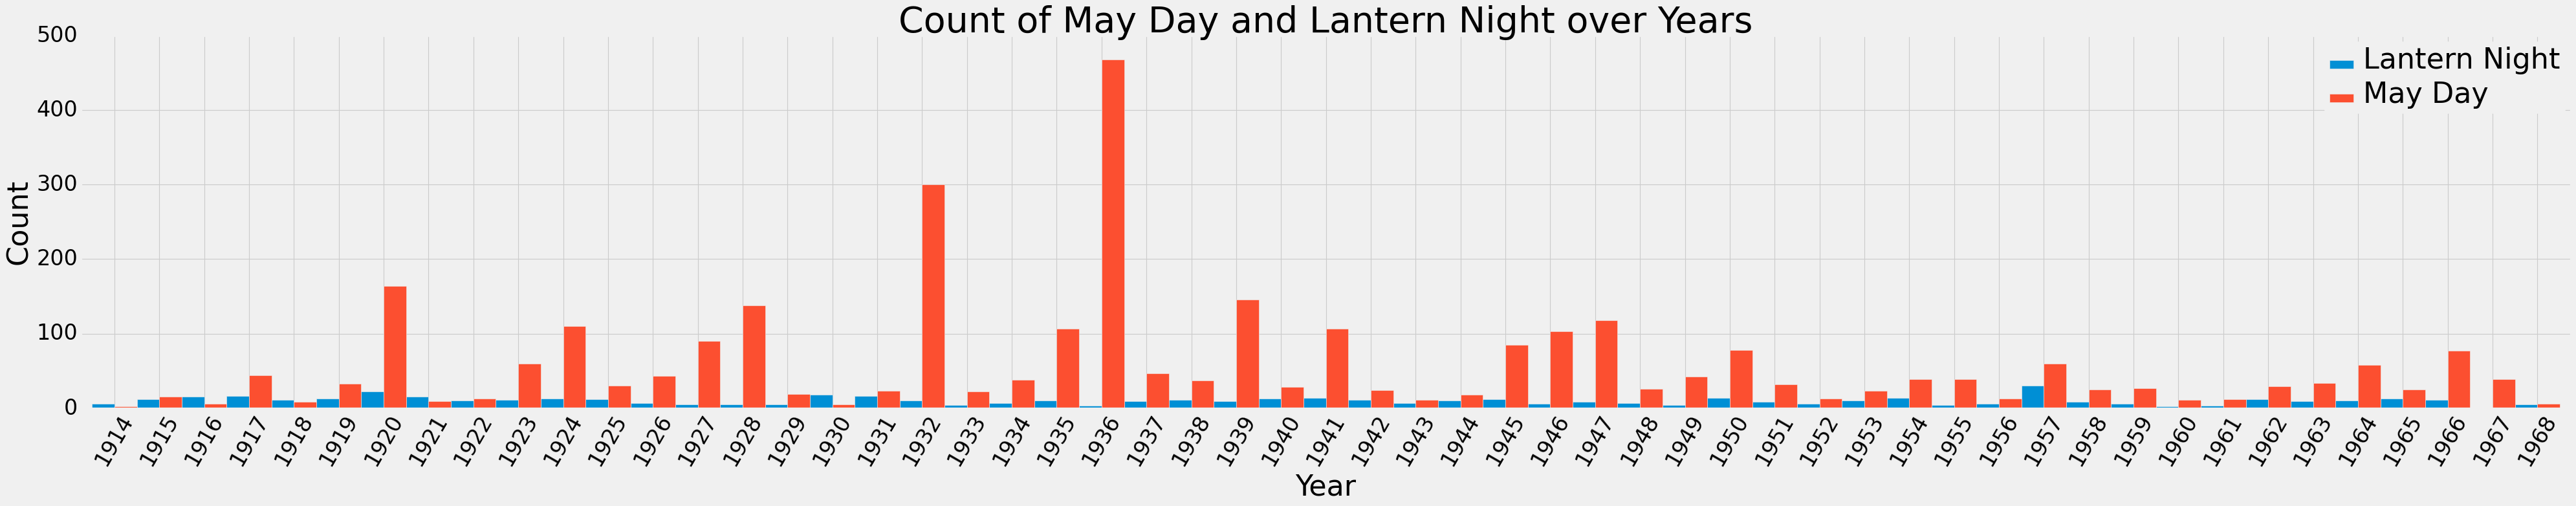

In [26]:
plt.style.use('fivethirtyeight')
bargraphdata = pd.DataFrame({'Lantern Night': lantern_list,
                   'May Day': mayday_list}, index=year_finallist)
ax = bargraphdata.plot.bar(rot=60, width = 1, figsize=(50, 10))
plt.xticks(fontsize = 30, c='black')
plt.yticks(fontsize = 30, c='black')
plt.xlabel("Year", fontsize = 40, c='black')
plt.ylabel("Count", fontsize = 40, c='black')
plt.title("Count of May Day and Lantern Night over Years", fontsize = 50, c='black')
plt.legend()
legend = plt.legend()
plt.setp(legend.get_texts(), color='black', fontsize = 40)
plt.tight_layout()